<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Combined_WatsonToneAnalyser_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Watson Tone Analyser Mini-project - combined
----


# Project - Extract a set of tweets for tone analysis
---

Search for some tweets (maybe with a particular tag, maybe from a particular user) and analyse the text for its tone, using the IBM Tone Analyser, or another IBM service

1.  Sign up for a developer account on Twitter (https://developer.twitter.com/) and copy your bearer token to a document on your own device (e.g. notepad)

2.  Install the tweepy library (for Twitter) into this notebook

# Must have the Twitter API client open and logged in to before you can access it - any issues then restart runtime.

In [ ]:
!pip install tweepy --upgrade

     |████████████████████████████████| 77 kB 2.9 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


3. Store your bearer token in an environment variable (a variable within the OS) so that it can be hidden from notebook viewers (never upload a visible security code (key or token) to Github.   ONCE you have run the code cell below, remove the output cell that shows the bearer token you have copied in!

In [ ]:
#Input Bearer token to access the Twitter API next.
import os
os.environ['BEARER_TOKEN'] = input("Bearer token: ")

In [ ]:
import tweepy as tw

# get a Twitter client that will run a search for recent tweets (see https://docs.tweepy.org/en/stable/client.html#tweepy.Client.unhide_reply for other functions available in the client)
def get_tweets():
    client = tw.Client(bearer_token=os.environ.get('BEARER_TOKEN'))
    query = 'from:BBCNews'
    tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=15)
    return tweets

# use the get_tweets() function to get a list of tweets
tweet_list = get_tweets()
print(tweet_list)
for tweet in tweet_list[0]:
    tweet = str(tweet)
    tweetparts = tweet.split(':')
    if len(tweetparts) > 1:
      tweet = tweetparts[1]
    twt = " ".join(tweet.splitlines())
    print(twt)

Response(data=[<Tweet id=1508559330722947081 text='Tuesday’s Mirror: “Abramovich poisoned at peace talks” #BBCPapers #TomorrowsPapersToday https://t.co/TSvkP6YUxr https://t.co/dNmuTlcHgp'>, <Tweet id=1508558301822341135 text='Tuesday’s Express: “Triple lock is back! Pensions set to rise by 7.4%” #BBCPapers #TomorrowsPapersToday https://t.co/i662GGxMTN https://t.co/ysh1DZcDke'>, <Tweet id=1508557873672081418 text="Tuesday’s Times: “Abramovich ‘poisoned at talks'” #BBCPapers #TomorrowsPapersToday https://t.co/6TwsaFjoa1 https://t.co/xcLlKb9Eyg">, <Tweet id=1508557538236801041 text="Tuesday’s Star: “Abramovich ‘poisoned at peace talks'” #BBCPapers #TomorrowsPapersToday https://t.co/OjGP2jWaG2 https://t.co/DKWzfIBCYV">, <Tweet id=1508556757509058563 text='Tuesday’s Telegraph: “Partygate fines to be issued from today” #BBCPapers #TomorrowsPapersToday https://t.co/1OKJbdIeec https://t.co/9ph8WJgNOE'>, <Tweet id=1508556395670810625 text='Tuesday’s Mail: “Abramovich ‘blinded in poison attack’”

### I successfully extracted some tweets from Twitter with text that can be analysed using qualitative methods such as the Watson Tone Analyser below. 

However, due to issues access the IBM API I have had to skip this part. We did get some tone analysis data from our tutor who had an account with IBM so the rest of this project is based on the output she obtained for us.

# Part 2 - Creating a dataframe from analysed text data
----
For this project we were going to use the IBM Watson Tone Analyser API. We were supposed to send some text data to it, use security information stored in a config file to keep it secret, receive the results in JSON format, investigate the structure of the results and build a dataframe from them.

### However, IBM required us to give out credit card details to access a free version of the API!
Even when I added my details I still couldn't access the service so there was a probelm. Our tutor had an account so she ran the text data through the tone analyser for us. 

Then we could use her results to create a visualisation of tone and to report an overall set of statistics from the data.

# Skip to step 3 below

---

## Step 1 - sign up for IBM Watson services to use the Tone Analyser

1.  Sign up for [IBM Watson](https://cloud.ibm.com/registration?cm_mmc=dw-_-cognitive-_-topcoder-_-communityEducational1)
2.  Click 'Try on Cloud at no cost'  
3.  Select the London region  (costs reduced and performance improved when you use the nearest servers)  
4.  Create an IBM Cloud account (enter email and accept terms)  
5.  Follow the instructions to create the account  
6.  Provision the services  
7.  Then go to IBM Watson Studio  
8.  Select Tone Analyzer under the Your Services heading  
9.  You will be shown the **url** for the Tone Analyser API and an **API key** which is needed for using the API.

# Step 2 - add security to your worksheet to keep your apikey and url hidden

You can do this by using environment variables, which are stored in the operating system for this worksheet.

We will use a simplified system for storing the sensitive data so that it isn't visible in the worksheet:

1.  Ask for the api key to be input and store it in an environment variable called apikey

2.  Ask for the url to be input and store it in an environment variable

3.  Run the cell, type in the api key, then the url.  Once tis has been done.  Remove the output part of the cell.

In [ ]:
import os

# add the code to ask for the URL, then run this cell and when it has completed, remove the output (note: you will need to do this again if you return to the worksheet)
os.environ['APIKEY'] = input("Enter API key: ")
os.environ['URL'] = input("Enter URL: ")


# Install the ibm_watson libraries so that you can use their functions

In [ ]:
# install the ibm_watson libraries

!pip install ibm_watson

---

## Test to make sure it works

1.  Open this file, which has some text for you to test with: https://drive.google.com/file/d/1m65cPQGYQd1mwvEmfZw69-GMUBdo43k0/view?usp=sharing.  You will be able to copy and paste the text into here as needed.

2.  Get the environment variable for each of the two pieces of security information so that these do not need to be included in your notebook (have the keys available for copying and pasting).  To do this:

  ``` apikey = os.environ.get('APIKEY') ```

3.  Run the code below,which will create a ToneAnalyzer with the credentials from your environment variables, then paste the text from the **text-for-analysis.txt** file

4.  Decide what the data looks like and how this might be represented in a pandas dataframe

In [ ]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import os
import json

# get credentials from the environment variables you set
def get_secret(key):
    # add code here to get the keys from the environment variable and return the requested key
    # if there is an error print an error message and return None
    return os.environ.get(key)


    
def get_text_for_analysis():
    # add code here to input the text from the text-for-analysis.txt file and return the text it reads as one string
    # if there is an error, return None
    # return 'Team, I know that times are tough! Product sales have been disappointing for the past three quarters. We have a competitive product, but we need to do a better job of selling it!'
    return 'But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.'
     
    
# create a ToneAnalyzerV3 object, version 2017-09-21 using api key and url from config
authenticator = IAMAuthenticator(apikey=get_secret('APIKEY'))
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url(get_secret('URL'))

# get the text for analysis from the file
text = get_text_for_analysis()
if text:
    tone_analysis = tone_analyzer.tone(
        {'text': text},
        content_type='application/json'
    ).get_result()    
    print(tone_analysis)
else:
    print("No data")

# Step 3 - WORKING WITH THE OUTPUT OF TEXT ANALYSIS
----

### Watson Tone Analyser API Output
---

This is the output that the given text will produce. You will need to assign this output to a variable called **tone_analysis** in the function you are going to write below. 

```
{'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}

```



## Watson Tone Analyzer output:  

I decided to split the tone analysis output into paragrpahs to help me understand what it contained.

**{'document_tone':** 

**{'tones':**

[{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, 
{'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]	}, 

**'sentences_tone':** 	

[{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': 
[{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]},
{'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones':
 [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, 
{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]	}, 
{'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones':
 [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]											}


### Things of note:

1. There are 2 **tones** with 3 keys [score, tone_id and tone_name].

2. There are 3 sentences with 3 keys [ sentence_id, text and **tones** which comes from the level above].

3. Because one of the sentences has 2 tones then the df would need to have 4 rows to include all tones.

4. So each row would need to include sentence_id, text, score, tone_id and tone_name.


### Create a dataframe and start to populate with the data

You can create a **dataframe** from this data either by converting it manually into a table OR by using the pandas function pd.json_normalise(data).  

**Manually**:

One way to do this would be to create a list of dictionary records, with each record formed from the data from each row in the original 'sentences_tone' data.  You will need to loop through the rows in the 'sentences_tone' list, nesting a loop through the 'tones' list for each sentence.  For each, copy across the columns you feel should be included.

_Hint:_  
```
 for row in sentence_data:
        for col in row['tones']:
            new_row = {'sentence_id':row['sentence_id'], 'text':row['text'], 'tone_score':col['score'], 'tone_id':col['tone_id'],'tone_name':col['tone_name']}
```
**Using pandas**:

An alternative way to do this would be to create a pandas dataframe from the sentences_tone data list (using `pd.json_normalise(data)`)

In [ ]:
import pandas as pd
import numpy as np

# convert json data to a dataframe with one row for each tone for each sentence
def convert_to_tones_table(data):
    # return the data normalized into a dataframe (pd.json_normalise(data))
    # the dataframe should have the columns: sentence_id, text, score, tone_id, tone_name
    df = pd.json_normalize(data)
    return df

tone_analysis = {'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}
#convert the tone_analysis string to a table on the document_tone item
tone_table = convert_to_tones_table(tone_analysis['document_tone'])
#convert again on the tones item to get down to score, tone_id and tone_name - DO I EVEN NEED THIS?!
tone_normal = convert_to_tones_table(tone_table['tones'])
#transpose the table so that you get two rows for the two types of tone names - Analytical and Sadness.
tone_pivoted = tone_normal.transpose()

#straingforward conversion of the sentence_tone 
sentence_table = convert_to_tones_table(tone_analysis['sentences_tone'])
exploded_df = sentence_table.explode('tones', ignore_index=True)

exploded_df



,sentence_id,text,tones
0,0,"Team, I know that times are tough!","{'score': 0.801827, 'tone_id': 'analytical', '..."
1,1,Product sales have been disappointing for the ...,"{'score': 0.817406, 'tone_id': 'sadness', 'ton..."
2,1,Product sales have been disappointing for the ...,"{'score': 0.687768, 'tone_id': 'analytical', '..."
3,2,"We have a competitive product, but we need to ...","{'score': 0.506763, 'tone_id': 'analytical', '..."


In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Assign Exploded df to a new variable new_df
new_df = exploded_df
#create a new df with the tones column
tones_col_df = pd.DataFrame(new_df['tones'].to_list(), columns = ['score', 'tone_id', 'tone_name'])
#print(tones_col_df)

#Joins the two dfs back together
final_tone = new_df.join(tones_col_df)
final_tone


,sentence_id,text,tones,score,tone_id,tone_name
0,0,"Team, I know that times are tough!","{'score': 0.801827, 'tone_id': 'analytical', '...",0.801827,analytical,Analytical
1,1,Product sales have been disappointing for the ...,"{'score': 0.817406, 'tone_id': 'sadness', 'ton...",0.817406,sadness,Sadness
2,1,Product sales have been disappointing for the ...,"{'score': 0.687768, 'tone_id': 'analytical', '...",0.687768,analytical,Analytical
3,2,"We have a competitive product, but we need to ...","{'score': 0.506763, 'tone_id': 'analytical', '...",0.506763,analytical,Analytical


            sentence_id     score
tone_id                          
analytical          1.0  0.665453
sadness             1.0  0.817406


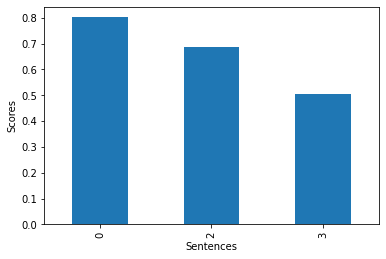

In [ ]:
#Code cell to calculate the average of Analytical scores and plot a bar chart.

def plot_scores(df,term):
  scores_mean = df.groupby(['tone_id']).mean(['score'])
  print(scores_mean)
  scores = df[df['tone_id'].str.contains(term)]
  scores
  scores['score'].plot.bar(x=None, y=None, xlabel = "Sentences", ylabel = "Scores")

  plt.show()
  return scores

analytical_scores = plot_scores(final_tone, "analytical")


### Summarise the sentence data
*  Which sentence is the most analytical?
*  which sentence is the least analytical?
*  what is the average analytical tone score for the sentences?
*  what do the analytical scores look like in a bar chart?

### My Answers:
1. The most analytical sentence is "Team, I know that times are hard!"
2. Least analyticial is "We have a competitive product, but ...."
3. The average analytical score is 0.665453.


In [ ]:
# Solution from Karen Scott using lambda function.
def convert_to_sentence_tones(data):
    df = pd.json_normalize(data)
    df = df.explode('tones', ignore_index=True)
    df['score'] = df['tones'].apply(lambda x: x['score'])
    df['tone_id'] = df['tones'].apply(lambda x: x['tone_id'])
    df['tone_name'] = df['tones'].apply(lambda x: x['tone_name'])
    df = df.drop(['tones'], axis=1)
    return df
# create sentences dataframe
sentences_data = convert_to_sentence_tones(tone_analysis['sentences_tone'])
display(sentences_data)

,sentence_id,text,score,tone_id,tone_name
0,0,"Team, I know that times are tough!",0.801827,analytical,Analytical
1,1,Product sales have been disappointing for the ...,0.817406,sadness,Sadness
2,1,Product sales have been disappointing for the ...,0.687768,analytical,Analytical
3,2,"We have a competitive product, but we need to ...",0.506763,analytical,Analytical


### Karen's version is more effeicient but I am proud that I managed a work around by myself.

### Challenging:  Report the tone data for the whole document
---

Play with the data, create a dataframe for the document_tone, tones data

 ```pd.json_normalize(document_tone)```  

Display the document score for each of the tones in the analysis

### Change the text in the text file and analyse the new text.
---

Here is some alternative, happier text.  Replace the text in the text-for-analysis.txt file with the text below.  Then run the notebook cells again to see the results.

But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.

### The result of this analysis is below:

```
{'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}
```

In [ ]:
import pandas as pd
import numpy as np

# convert json data to a dataframe with one row for each tone for each sentence - utilising Karen's method.
def convert_to_sentence_tones(data):
    df = pd.json_normalize(data)
    df = df.explode('tones', ignore_index=True)
    df = df.dropna() #drop Nan rows so that next lines will work
    df['score'] = df['tones'].apply(lambda x: x['score'])
    df['tone_id'] = df['tones'].apply(lambda x: x['tone_id'])
    df['tone_name'] = df['tones'].apply(lambda x: x['tone_name'])
    df = df.drop(['tones'], axis=1)
    #display(df)
    return df

#convert the new_text string to a table on the document_tone item
new_text = {'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}
#new_table = convert_to_sentence_tones(new_text['document_tone'])
#display(new_table)

#straingforward conversion of the sentence_tone 
sentence_table = convert_to_sentence_tones(new_text['sentences_tone'])
display(sentence_table)



,sentence_id,text,score,tone_id,tone_name
0,0,But I feel peaceful.,0.511185,joy,Joy
1,0,But I feel peaceful.,0.889390,tentative,Tentative
2,1,"Your success in the ring this morning was, to ...",0.919911,joy,Joy
3,2,Your future is assured.,0.977590,confident,Confident
4,3,"You will live, secure and safe, Wilbur.",0.801827,analytical,Analytical
5,3,"You will live, secure and safe, Wilbur.",0.921250,confident,Confident
8,6,The leaves will shake loose from the trees and...,0.621679,fear,Fear
9,7,"Christmas will come, and the snows of winter.",0.614764,joy,Joy
10,8,You will live to enjoy the beauty of the froze...,0.930779,joy,Joy
11,9,"Winter will pass, the days will lengthen, the ...",0.654012,sadness,Sadness


            sentence_id     score
tone_id                          
analytical     3.000000  0.801827
confident      5.333333  0.853016
fear           6.000000  0.621679
joy            6.166667  0.752764
sadness        9.000000  0.654012
tentative      0.000000  0.889390


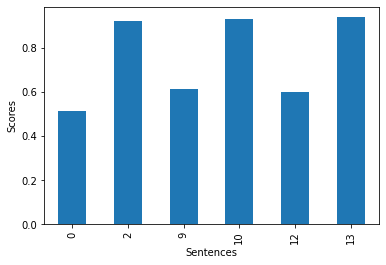

In [ ]:
#Calculate the average of Joy scores and plot a bar chart.
analytical_scores = plot_scores(sentence_table, "joy")


# Reflections
---
### What did you learn?

In this project we tackled the use of API cloud services to collect and analyse qualitative data such as text with sentiments. Despite the issues accessing the IBM Watson Tone analysers I was able to complete the work set out to convert the output from the Watson Tone analyser into a pandas dataframe to be further analysed.

We were introduced to SSH security keys and how to save them as an environmental variable in the Colabs worksheet safely.

As an extra attempt at retrieving data from and API we gained access to Twitter's API and used the Tweepy library to extract some tweets from a public account. I chose BBC News for this. The next step would have been to pass the tweets through the IBM Watson Tone Analyser.

Hopefully, I will be able to attempt this in the future for my own development.
